# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: ANOVA
### VIDEO: Two-way mixed-effects ANOVA
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
import pandas as pd
import seaborn as sns

In [2]:
## the data and group labels

data = np.loadtxt(open("TwoWayMixedANOVA_data.csv"),delimiter=",")

timepoint = ['1']*45 + ['2']*45 + ['3']*45
groups    = ['1']*15 + ['2']*15 + ['3']*15
s = []
for i in range(45):
    s += [str(i)]

# # convert to pandas
df = pd.DataFrame(data=np.matrix.flatten(data,'F'),columns=['TheData'])
df['Group'] = np.tile(groups,3)
df['TimePoint'] = timepoint
df['Subject'] = np.tile(s,3)

pd.set_option("display.max_rows", None, "display.max_columns", None)
df

,TheData,Group,TimePoint,Subject
0,13.0,1,1,0
1,15.0,1,1,1
2,13.0,1,1,2
3,16.0,1,1,3
4,17.0,1,1,4
5,18.0,1,1,5
6,16.0,1,1,6
7,16.0,1,1,7
8,18.0,1,1,8
9,17.0,1,1,9


In [3]:
pg.mixed_anova(data=df,dv='TheData',between='Group',within='TimePoint',subject='Subject')

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,40.311111,2,42,20.155556,2.446942,9.880857e-02,0.104361,NaN
1,TimePoint,69.644444,2,84,34.822222,31.147184,7.588754e-11,0.425815,0.901879
2,Interaction,57.777778,4,84,14.444444,12.920019,3.051011e-08,0.380897,NaN


<AxesSubplot:xlabel='TimePoint', ylabel='TheData'>

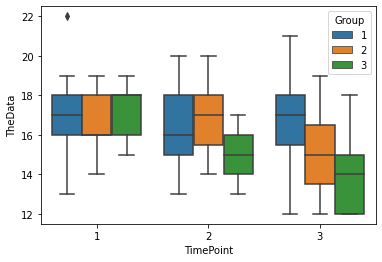

In [4]:
sns.boxplot(data=df,hue="Group",y="TheData",x='TimePoint')